In [173]:
#0 - Packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [94]:
#1 - Visualizar informações inicais dos dados e modificar unidades da primeira coluna

turbinas = pd.read_csv('T1.csv')
turbinas['Date/Time'] = pd.to_datetime(turbinas['Date/Time'])
print(turbinas.shape)
turbinas.info()
turbina.head()

(50530, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date/Time                      50530 non-null  datetime64[ns]
 1   LV ActivePower (kW)            50530 non-null  float64       
 2   Wind Speed (m/s)               50530 non-null  float64       
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64       
 4   Wind Direction (°)             50530 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 1.9 MB


,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286


<AxesSubplot:xlabel='Wind Speed (m/s)', ylabel='LV ActivePower (kW)'>

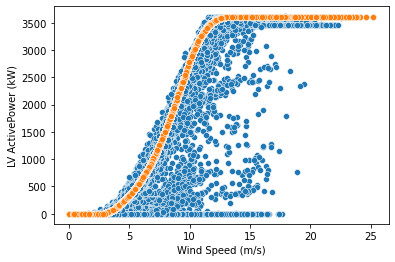

In [51]:
#2 - Comparar desempenho prático e teórico de energia gerada pelas turbinas

sns.scatterplot(data = turbinas, x = 'Wind Speed (m/s)', y = 'LV ActivePower (kW)')
sns.scatterplot(data = turbinas, x = 'Wind Speed (m/s)', y = 'Theoretical_Power_Curve (KWh)')

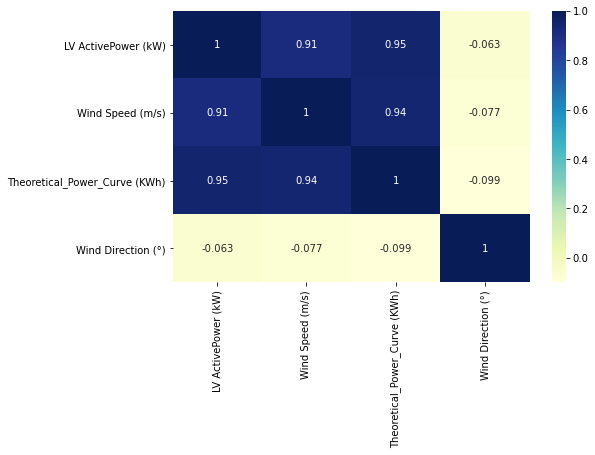

In [184]:
#3 - Definir margem de erro através da correlação entre ActivePower e Theoretical_Power_Curve

plt.figure(figsize = (8,5))
sns.heatmap(turbinas.iloc[:,1:].corr(),cmap="YlGnBu",annot = True)
plt.show()


In [185]:
#4 - Apartir da definição de 6,5%. Estabelecer quantas amostras se encaixam na margem de erro aceitável
me = (1-0.95)


efetiva = turbinas['LV ActivePower (kW)'].tolist()
teorica = turbinas['Theoretical_Power_Curve (KWh)'].tolist()
limite_s = []
limite_i = []
aceitavel = []



for potencia in teorica:
    limite_s.append(potencia*(1+me))
    limite_i.append(potencia*(1-me))

for p, potencia in enumerate(efetiva):
    if potencia>=limite_i[p] and potencia<=limite_s[p]:
        aceitavel.append('Aceitável')
        
    else: 
        aceitavel.append('Não aceitável')

import colorama
from colorama import Fore
        
print('Quantidade de amostras DENTRO da margem de erro =', aceitavel.count('Aceitável'))
valor = round((aceitavel.count('Aceitável')/len(aceitavel))*100, 2)
print(Fore.GREEN + 'Em % =', valor)
        

Quantidade de amostras DENTRO da margem de erro = 18841
Em % = 37.29


<AxesSubplot:xlabel='Wind Speed (m/s)', ylabel='LV ActivePower (kW)'>

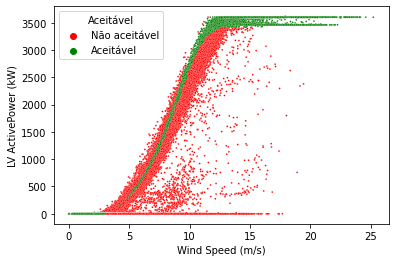

In [186]:
#5 - Visualizanr as amostras que se enquadram, ou não, na margem de erro

turbinas['Aceitável'] = aceitavel
cores = {'Aceitável':'green', 'Não aceitável':'red'}
sns.scatterplot(data = turbinas, x = 'Wind Speed (m/s)', y = 'LV ActivePower (kW)', hue='Aceitável', s=3, palette=cores)

In [179]:
#6 - Testes de predição de quantidade de resultados aceitáveis e não aceitáveis, a partir dos modelos de Random Forest, Support Vector Regression e Linear Regression 
x = turbinas.iloc[:,2:4]
y = turbinas.iloc[:,1]

x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.15,random_state = 0)

def Model_pipeline(model) :
    Model = Pipeline(steps = [
    ('imputation', SimpleImputer(strategy='median')),
    ('Scaler',StandardScaler()),
    ('regression',model)])
    return Model

rf = RandomForestRegressor(n_estimators=100)
sv = SVR()
lr = LinearRegression()

#x = x.values.reshape(-1, 1)
#y = y.values.reshape(-1, 1)

#Random Forest
model1 = Model_pipeline(rf)
model1.fit(x_train , y_train)
y_pred1=model1.predict(x_test)
model1.score(x_test,y_test)




0.865826610778086

In [180]:
#Support Vector Regression 

model2 = Model_pipeline(sv)
model2.fit(x_train , y_train)
y_pred2=model2.predict(x_test)
model2.score(x_test,y_test)


0.9028303298919275

In [181]:
#Linear Regression

model3 = Model_pipeline(lr)
model3.fit(x_train , y_train)
y_pred3=model3.predict(x_test)
model3.score(x_test,y_test)


0.9036593144656603

In [189]:
skl.linear_model.LogisticRegression()

NameError: name 'skl' is not defined

(0.0, 60.0)

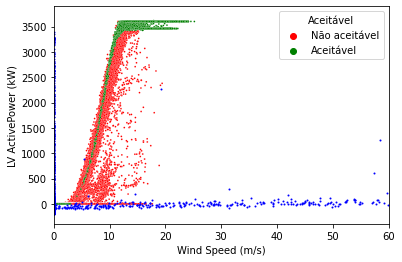

In [187]:
#7 - Gráfico de predição do modelo mais eficinte - Linear Regression

plt.plot( y_test, y_pred3, 'o',markersize= 1, color = 'blue')
cores = {'Aceitável':'green', 'Não aceitável':'red'}
sns.scatterplot(data = turbinas, x = 'Wind Speed (m/s)', y = 'LV ActivePower (kW)', hue='Aceitável', s=3, palette=cores)
ax = plt.gca()
ax.set_xlim([0,60])

